<a href="https://colab.research.google.com/github/pratap977/CS6910/blob/main/Assignment-2/CNN_Part1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install split-folders

In [2]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 13.7 MB/s 
     |████████████████████████████████| 144 kB 23.6 MB/s 
     |████████████████████████████████| 181 kB 66.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=058662ba0b597c212f721612925c8ad330788c390efc854ac4ea7e7b7e6e126b
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image as im
import math as mh
from matplotlib import pyplot
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dense,Flatten
from keras.preprocessing.image import load_img as im
from keras.preprocessing.image import save_img as sim
import os
from random import shuffle
import numpy as np
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers,models
import splitfolders
import keras
# keras.backend.set_image_data_format('channels_first')

In [4]:
  # for large dataset  having 12000 images
  src_url = "https://storage.googleapis.com/wandb_datasets/nature_12K.zip"
  src_zip = "nature_12K.zip"
  DATA_SRC = "inaturalist_12K/train" # (technically a subset of only 10K images)
  IMAGES_PER_LABEL = 1000
  BALANCED_SPLITS = {"train" : 800, "val" : 100, "test": 100}

In [5]:
# for small dataset having 1000 images 
src_url = "https://storage.googleapis.com/wandb_datasets/nature_1K.zip"
src_zip = "nature_1K.zip"
DATA_SRC = "nature_1K"
IMAGES_PER_LABEL = 100
BALANCED_SPLITS = {"train" : 80, "val" : 10, "test": 10}

In [ ]:
src_url = "https://storage.googleapis.com/wandb_datasets/nature_100.zip"
src_zip = "nature_100.zip"
DATA_SRC = "nature_100"
IMAGES_PER_LABEL = 10
BALANCED_SPLITS = {"train" : 8, "val" : 1, "test": 1}

In [4]:
%%capture
!curl -SL $src_url > $src_zip
!unzip $src_zip

In [6]:
data_folders="/content/nature_1K"

In [7]:
splitfolders.ratio(data_folders, output="outputfin", seed=1337, ratio=(.9, .1), group_prefix=None)

Copying files: 1000 files [00:02, 399.92 files/s]


In [8]:
class_labels = os.listdir("/content/outputfin/train")

In [9]:
lab={l:i for l,i in zip(class_labels,range(10))}
lab

{'Amphibia': 2,
 'Animalia': 4,
 'Arachnida': 5,
 'Aves': 3,
 'Fungi': 8,
 'Insecta': 0,
 'Mammalia': 7,
 'Mollusca': 9,
 'Plantae': 1,
 'Reptilia': 6}

In [10]:
imgs_tr = []
filenames = []

truth_tr = []
for l in class_labels:
  if l.startswith("."):
    continue
  imgs_per_class = os.listdir(os.path.join("/content/outputfin/train", l))
  for img in imgs_per_class:
    
    filenames.append(img.split(".")[0])
    truth_tr.append(lab[l])
    img_path = os.path.join("/content/outputfin/train", l, img)
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    # don't forget to rescale test images to match the range of inputs
    # to the network
    img = img/255.0
    imgs_tr.append(img)
x_train=np.asarray(imgs_tr)
y_train=np.asarray(truth_tr)

In [ ]:
len(imgs_tr)

900

In [11]:
imgs_val = []
filenames = []

truth_val = []
for l in class_labels:
  if l.startswith("."):
    continue
  imgs_per_class = os.listdir(os.path.join("/content/outputfin/val", l))
  for img in imgs_per_class:
    
    filenames.append(img.split(".")[0])
    truth_val.append(lab[l])
    img_path = os.path.join("/content/outputfin/val", l, img)
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    # don't forget to rescale test images to match the range of inputs
    # to the network
    img = img/255.0
    imgs_val.append(img)
x_val=np.asarray(imgs_val)
y_val=np.asarray(truth_val)

In [12]:
imgs_tes = []
filenames = []

truth_tes = []
for l in class_labels:
  if l.startswith("."):
    continue
  imgs_per_class = os.listdir(os.path.join("/content/outputfin/val", l))
  for img in imgs_per_class:
    
    filenames.append(img.split(".")[0])
    truth_tes.append(lab[l])
    img_path = os.path.join("/content/outputfin/val", l, img)
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    # don't forget to rescale test images to match the range of inputs
    # to the network
    img = img/255.0
    imgs_tes.append(img)

In [13]:
x_test=np.asarray(imgs_tes)
y_test=np.asarray(truth_tes)

In [ ]:
y_train.shape[0]

800

In [ ]:
# # import tensorflow as tf

# class MyModel(tf.keras.Model):

#   def __init__(self):
#     super(MyModel, self).__init__()
#     self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
#     self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
#     self.dropout = tf.keras.layers.Dropout(0.5)

#   def call(self, inputs, training=False):
#     x = self.dense1(inputs)
#     if training:
#       x = self.dropout(x, training=training)
#     return self.dense2(x)

# # model = MyModel()

In [14]:
class Block(tf.keras.Model):
    def __init__(self,fil,ker,actvi,ds,optim,drop,batch):      
        super(Block, self).__init__()

        self.l1=layers.Conv2D(filters=fil[0], kernel_size=(ker[0], ker[0]), activation=actvi[0])
        self.l11=layers.MaxPooling2D((2, 2))
        
        self.l2=layers.Conv2D(filters=fil[1], kernel_size=(ker[1], ker[1]), activation=actvi[1])
        self.l22=layers.MaxPooling2D((2, 2))
                                                  
        self.l3=layers.Conv2D(filters=fil[2], kernel_size=(ker[2], ker[2]), activation=actvi[2])
        self.l33=layers.MaxPooling2D((2, 2))
         
        self.l4=layers.Conv2D(filters=fil[3], kernel_size=(ker[3], ker[3]), activation=actvi[3])
        self.l44=layers.MaxPooling2D((2, 2))
              
        self.l5=layers.Conv2D(filters=fil[4], kernel_size=(ker[4], ker[4]), activation=actvi[4])
        self.l55=layers.MaxPooling2D((2, 2))
        
        self.l555=layers.Flatten()
        
        self.l6=layers.Dense(ds, activation=actvi[5])
        self.l7=layers.Dense(10, activation='softmax')
     
        self.drop=drop
        self.optim=optim
        self.batch=batch
        
    # def addfeatures(self,batch,optm,drop=0):
    #   self.batch=batch
    #   self.drop=drop/100
    #   self.optm=optm


    def loss_cal(self,y_train,yin):
      cost=0
      for i in range(len(y_train)):
        cost+=np.log(yin[i][y_train[i]])
      return -cost/len(yin) 
    
    def acc_train(self,y_train,yin):
      cost=0
      for i in range(len(y_train)):
          if(np.argmax(yin[i])==y_train[i]):
            cost+=1
      return cost
    
    def parameters(self):
      p=[]
      p.append(self.l1.weights[0].shape)
      # print(p)
      p.append(self.l2.weights[0].shape)
      p.append(self.l3.weights[0].shape)
      p.append(self.l4.weights[0].shape)
      p.append(self.l5.weights[0].shape)
      p.append(self.l6.weights[0].shape)
      p.append(self.l7.weights[0].shape)
      totparams=0
      for i in range(len(p)):
        params=1
        for j in p[i]:
          # print(j)
          params*=j
        print("parameters in layer:  ",i,"  --- ",params+p[i][-1])
        totparams+=params+p[i][-1]
      print("total para in network    :",totparams)
      
      totcomp=0
      add=0
      print("                                     Multi      Adds")
      for i in range(len(p)):
        comp=1
        for j in p[i]:
          # print(j)
          comp*=j
        comp/=p[i][-1]
        add=comp-1
        for k in self.lay[i]:
          comp*=k
          add*=k
        comp/=self.lay[i][0]
        add/=self.lay[i][0]
        print("computations in layer:  ",i,"  --- ",comp," ---",add)
        totcomp+=comp
      print("total computations in network    :",totcomp)
    
    def call(self, inputs):
        self.lay=[]
        self.lay.append(inputs.shape)
        x = self.l1(inputs)
        self.lay.append(x.shape)
        x = self.l11(x)
        self.lay.append(x.shape)
        if(self.batch=='YES'):
          x=layers.BatchNormalization()(x)
        
        x = self.l2(x)
        self.lay.append(x.shape)
        x=self.l22(x)
        self.lay.append(x.shape)
        if(self.batch=='YES'):
          x=layers.BatchNormalization()(x)

        x=self.l3(x)
        self.lay.append(x.shape)
        x=self.l33(x)
        self.lay.append(x.shape)
        if(self.batch=='YES'):
          x=layers.BatchNormalization()(x)

        x=self.l4(x)
        self.lay.append(x.shape)
        x=self.l44(x)
        self.lay.append(x.shape)
        if(self.batch=='YES'):
          x=layers.BatchNormalization()(x)

        x=self.l5(x)
        self.lay.append(x.shape)
        x=self.l55(x)
        self.lay.append(x.shape)
        x=self.l555(x)
        if(self.batch=='YES'):
          x=layers.BatchNormalization()(x)
        
        x=layers.Dropout(self.drop)(x)
        x=self.l6(x)
        # x=self.l7(x)
       
        return self.l7(x)

In [1]:
def train_model(x_train,y_train,model,batchsize,epochs,x_val,y_val):
  xlength=len(x_train)
  losss=0
  step=0
  for epochs in range(epochs):
    print("epoch  :",epochs)
    for j in range(int(np.floor(xlength/batchsize))):
      step+=1
      l=(j)*batchsize
      m=(j+1)*batchsize
      with tf.GradientTape() as tape:
        pred=model(x_train[l :xlength-1 if (m>=xlength) else m])
        loss=model.loss_cal(y_train[l:xlength-1 if (m>=xlength) else m], pred)
        #loss=tf.constant(loss)
        accuracy=model.acc_train(y_train[l:xlength-1 if (m>=xlength) else m], pred)
        #wandb.log({"loss":loss ,"accuracy":accuracy, "step": step})
        ls=keras.losses.SparseCategoricalCrossentropy()(y_train[l:xlength-1 if(m>=xlength) else m], pred)
        #print(ls,loss,accuracy, model.l2.trainable_weights[0][1][2][2][2])
      grads = tape.gradient(ls,model.trainable_weights)
      model.optim.apply_gradients(zip(grads, model.trainable_weights))
      #losss+=loss*batchsize
    print("done")
    # pred=model(x_train)
    # loss=model.loss_cal(y_train, pred)
    # #loss=tf.constant(loss)
    # accuracy=model.acc_train(y_train, pred)
    val_pred=model(x_val)
    val_loss=model.loss_cal(y_val,val_pred)
    val_accuracy=model.acc_train(y_val,val_pred)
    #losss=losss/xlength
    val_loss=val_loss/x_val.shape[0]
    #wandb.log({"avgloss":losss , "epochs": epochs})s
    print(epochs,ls,loss,accuracy,val_loss,val_accuracy, model.l2.trainable_weights[0][1][2][2][2])
    #wandb.log({"loss":losss ,"accuracy":accuracy, "epochs": epochs,"val_loss":val_loss ,"val_accuracy":val_accuracy})

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model=Block([32,64,64,64,64],[3,3,3,3,3],6*['relu'],64,optimizer,0.3,'NO')
# model.addfeatures('YES',optimizer,5)

# train_model(x_train,y_train,model,100,7,x_val,y_val)

In [ ]:
train_model(x_train,y_train,model,32,7,x_val,y_val)

epoch  : 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


done
0 tf.Tensor(2.8193932, shape=(), dtype=float32) 2.8193933069705963 0 0.02339036136865616 10 tf.Tensor(0.019594928, shape=(), dtype=float32)
epoch  : 1
done
1 tf.Tensor(2.4552443, shape=(), dtype=float32) 2.455244302749634 0 0.023049394130706786 10 tf.Tensor(0.016867824, shape=(), dtype=float32)
epoch  : 2


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=100, epochs=1, validation_split=0.1)

AttributeError: ignored

In [ ]:
sweep_configer = {
                  'method': 'grid',
                  'metric':{
                            'name':'accuracy',
                            'goal':'maximize'
                            },
                  'parameters': {
                                'filters'   : {'values': [32, 64, 96, 128, 256]},
                                'kerneldim'   :{'values':[3,5,7,9]},
                                'dropout'   :{'values':[0.1,0.3,0.4]}, 
                                'neurons':{'values':[256,100,50,60]}, 
                                'epochs'    :{'values':[5,10,20,30]},                          
                              }
              }

In [ ]:
sweep_config = {
                  'method'    : "grid",
                  'metric':{
                            'name':'accuracy',
                            'goal':'maximize'
                            },
                  'parameters': {
                                  'flt'                 : {'values' :[32, 64,16]  },
                                  'filterorg'               : {'values' :[1,2,0.5] },
                                  'kerneldim'               : {'values' :[3,4,5,7]  },
                                  'activation'              : {'values' :['sigmoid','relu','tanh'] },
                                  'neurons'                 : {'values' :[20,30] },
                                  'optimizer'               : {'values' :['sgd','adam','rmsprop','rmsprop'] },
                                  'lr'                      : {'values' :[1e-3,1e-4,2e-3] },
                                  'gama'                    : {'values' :[1e-3,2e-3,5e-3] },
                                  'epochs'                  : {'values' :[10,20,30] },
                                  'batchsize'               : {'values' :[16,32] },
                                  'dropout'                 : {'values' :[20,30,0,10] },
                                  'batchnormalisation'       : {'values' :['YES','NO']} ,
                                }
                }

In [ ]:
 hyperparameter=dict(
      epochs = 5,                                       
      batchsize = 10,                                                                                                
      filters = 32,
      filterorg=2,
      neurons=30     ,                          
      lr=1e-3,
      activation='sig',
      dropout=0,                                             
      optimizer= "momentum",
      gama=0.05,                      
      dataaug= 'NO',           
      batchnormalisation= "YES",
      kerneldim=3
      
  )

In [ ]:
def conlay():
  # wandb.init(config=hyperparameter)
  wandb.init(config=sweep_config,project="Convol_NN",magic=True)   
  # config=wandb.config   
  f= wandb.config.flt 
  fo=  wandb.config.filterorg                           
  fil=[ (int)(f*(fo)**i) if((int)(f*(fo)**i)>0) else  1 for i in range(5)]
  kd=wandb.config.kerneldim
  dim=[kd for i in range(5)]
  activations=['relu','relu','relu','relu','relu',wandb.config.activation]
  if(wandb.config.optimizer=="sgd"):
    optim = tf.keras.optimizers.SGD(learning_rate=wandb.config.lr)
  elif(wandb.config.optimizer=="adam"):
    optim = tf.keras.optimizers.Adam(learning_rate=wandb.config.lr)
  elif(wandb.config.optimizer=="momentum"):
    optim = tf.keras.optimizers.SGD(learning_rate=wandb.config.lr,momentum=wandb.config.gama)
  elif(wandb.config.optimizer=="rmsprop"):
    optim = tf.keras.optimizers.RMSprop(learning_rate=wandb.config.lr)
    
  # print(fil)
  # print(dim,activations)
  model=Block(fil,dim,activations,wandb.config.neurons,optim,wandb.config.dropout,wandb.config.batchnormalisation)
  # model.addfeatures(, tf.keras.optimizers.Adam(learning_rate=wandb.config.lr))
  train_model(x_train,y_train,model,wandb.config.batchsize,wandb.config.epochs,x_val,y_val)

  # model.compile(loss="sparse_categorical_crossentropy", optimizer=optim,metrics=["accuracy"])
  # model.fit(x_train, y_train, batch_size=wandb.config.batchsize, epochs=wandb.config.epochs, validation_split=0.1)

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# wandb.init(project="Convol_NN")

In [ ]:
# import wandb
sweep_id = wandb.sweep(sweep_config)

Create sweep with ID: g0a8ywj0
Sweep URL: https://wandb.ai/sashedher/uncategorized/sweeps/g0a8ywj0


In [ ]:
wandb.agent(sweep_id, function=conlay)

wandb: Agent Starting Run: apmheivy with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.001
wandb: 	neurons: 20
wandb: 	optimizer: sgd
wandb: Currently logged in as: sashedher (use `wandb login --relogin` to force relogin)
wandb: WARNING Ignored wandb.init() arg project when running a sweep


wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(1.7457039, shape=(), dtype=float32) 1.7457038834691048 0.0 tf.Tensor(-0.06823601, shape=(), dtype=float32)
tf.Tensor(1.7415959, shape=(), dtype=float32) 1.741595908999443 0.0 tf.Tensor(-0.068236135, shape=(), dtype=float32)
tf.Tensor(1.7348233, shape=(), dtype=float32) 1.7348233833909035 0.0 tf.Tensor(-0.068236366, shape=(), dtype=float32)
tf.Tensor(1.7312703, shape=(), dtype=float32) 1.7312702983617783 0.0 tf.Tensor(-0.06823648, shape=(), dtype=float32)
tf.Tensor(1.7257627, shape=(), dtype=float32) 1.725762777030468 0.0 tf.Tensor(-0.068236694, shape=(), dtype=float32)
tf.Tensor(2.2201838, shape=(), dtype=float32) 2.2201838344335556 0.0 tf.Tensor(-0.06823659, shape=(), dtype=float32)
tf.Tensor(3.0525422, shape=(), dtype=float32) 3.052542194724083 0.0 tf.Tensor(-0.06823625, shape=(), dtype=float32)
tf.Tensor(3.045431, shape=(), dtype=float32) 3.045430913567543 0.0 tf.Tensor(-0.06823617, shape=(), dtype=float32)
tf.Tensor(3.0379636, shape=(), dtype=float32) 3.0379635

loss,2.47932
accuracy,0.1
epochs,9
_runtime,1362
_timestamp,1618935701
_step,19
val_loss,0.02425


loss,█▇▆▆▅▄▃▃▂▁
accuracy,▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▇▆▆▅▄▃▃▂▁


wandb: Agent Starting Run: h5q6jyuv with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.001
wandb: 	neurons: 20
wandb: 	optimizer: adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(2.6502252, shape=(), dtype=float32) 2.650225192308426 0.0 tf.Tensor(-0.09856735, shape=(), dtype=float32)
tf.Tensor(2.5239758, shape=(), dtype=float32) 2.5239757001399994 0.0 tf.Tensor(-0.099426016, shape=(), dtype=float32)
tf.Tensor(2.3368533, shape=(), dtype=float32) 2.3368532061576843 0.0 tf.Tensor(-0.100312814, shape=(), dtype=float32)
tf.Tensor(2.0739603, shape=(), dtype=float32) 2.073960453271866 0.0 tf.Tensor(-0.10121605, shape=(), dtype=float32)
tf.Tensor(1.7355375, shape=(), dtype=float32) 1.7355374693870544 0.0 tf.Tensor(-0.101949275, shape=(), dtype=float32)
tf.Tensor(2.1419377, shape=(), dtype=float32) 2.141937769949436 0.625 tf.Tensor(-0.102556676, shape=(), dtype=float32)
tf.Tensor(3.3708458, shape=(), dtype=float32) 3.370845690369606 0.0 tf.Tensor(-0.10313234, shape=(), dtype=float32)
tf.Tensor(3.285891, shape=(), dtype=float32) 3.2858911901712418 0.0 tf.Tensor(-0.10357585, shape=(), dtype=float32)
tf.Tensor(3.257944, shape=(), dtype=float32) 3.25794

loss,2.38825
accuracy,0.1
epochs,9
_runtime,1362
_timestamp,1618937070
_step,19
val_loss,0.02317


loss,█▄▃▂▂▂▁▁▁▁
accuracy,▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▆▅▄▃▂▂▁▁▁


wandb: Agent Starting Run: 6cqpfl1u with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.001
wandb: 	neurons: 20
wandb: 	optimizer: rmsprop
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(3.0283785, shape=(), dtype=float32) 3.028378441929817 0.0 tf.Tensor(-0.054971945, shape=(), dtype=float32)
tf.Tensor(2.6447163, shape=(), dtype=float32) 2.6447161585092545 0.0 tf.Tensor(-0.05181272, shape=(), dtype=float32)
tf.Tensor(1.3502378, shape=(), dtype=float32) 1.3502377569675446 0.8125 tf.Tensor(-0.05496198, shape=(), dtype=float32)
tf.Tensor(0.8893028, shape=(), dtype=float32) 0.8893027901649475 1.0 tf.Tensor(-0.053521764, shape=(), dtype=float32)
tf.Tensor(0.84707034, shape=(), dtype=float32) 0.847070325165987 1.0 tf.Tensor(-0.053607784, shape=(), dtype=float32)
tf.Tensor(1.6088946, shape=(), dtype=float32) 1.6088946089148521 0.625 tf.Tensor(-0.053368896, shape=(), dtype=float32)
tf.Tensor(2.7123282, shape=(), dtype=float32) 2.7123282104730606 0.0 tf.Tensor(-0.05340344, shape=(), dtype=float32)
tf.Tensor(2.3603585, shape=(), dtype=float32) 2.3603584468364716 0.0 tf.Tensor(-0.053861532, shape=(), dtype=float32)
tf.Tensor(2.2758327, shape=(), dtype=float32

loss,2.63373
accuracy,0.1
epochs,9
_runtime,1398
_timestamp,1618938476
_step,19
val_loss,0.03037


loss,▃▃▃▁▅▃▃█▇▇
accuracy,█▂█▂█▂█▂▁▂█▂▁▂▁▂▁▂█▂
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,▁▇▂█▄▆▂▁▁▄


wandb: Agent Starting Run: ot1lezp0 with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.001
wandb: 	neurons: 30
wandb: 	optimizer: sgd
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(2.5665112, shape=(), dtype=float32) 2.5665110647678375 0.0 tf.Tensor(0.068503186, shape=(), dtype=float32)
tf.Tensor(2.5554667, shape=(), dtype=float32) 2.555466651916504 0.0 tf.Tensor(0.06850312, shape=(), dtype=float32)
tf.Tensor(2.5459943, shape=(), dtype=float32) 2.5459944009780884 0.0 tf.Tensor(0.06850314, shape=(), dtype=float32)
tf.Tensor(2.5308678, shape=(), dtype=float32) 2.530867800116539 0.0 tf.Tensor(0.06850316, shape=(), dtype=float32)
tf.Tensor(2.5218735, shape=(), dtype=float32) 2.521873563528061 0.0 tf.Tensor(0.06850314, shape=(), dtype=float32)
tf.Tensor(2.518877, shape=(), dtype=float32) 2.518876940011978 0.0 tf.Tensor(0.06850313, shape=(), dtype=float32)
tf.Tensor(2.5272155, shape=(), dtype=float32) 2.5272155851125717 0.0 tf.Tensor(0.06850313, shape=(), dtype=float32)
tf.Tensor(2.5212302, shape=(), dtype=float32) 2.5212304294109344 0.0 tf.Tensor(0.06850299, shape=(), dtype=float32)
tf.Tensor(2.5052218, shape=(), dtype=float32) 2.505222052335739 0

loss,2.46002
accuracy,0.1
epochs,9
_runtime,1438
_timestamp,1618939924
_step,19
val_loss,0.02408


loss,█▇▆▅▄▃▃▂▂▁
accuracy,▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▇▆▅▄▃▃▂▂▁


wandb: Agent Starting Run: g5if9d5d with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.001
wandb: 	neurons: 30
wandb: 	optimizer: adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(3.141154, shape=(), dtype=float32) 3.1411539167165756 0.0 tf.Tensor(0.0492291, shape=(), dtype=float32)
tf.Tensor(2.9452314, shape=(), dtype=float32) 2.9452316910028458 0.0 tf.Tensor(0.04823665, shape=(), dtype=float32)
tf.Tensor(2.606164, shape=(), dtype=float32) 2.6061639487743378 0.0 tf.Tensor(0.047289215, shape=(), dtype=float32)
tf.Tensor(2.1021934, shape=(), dtype=float32) 2.1021934375166893 0.0 tf.Tensor(0.046665784, shape=(), dtype=float32)
tf.Tensor(1.4828824, shape=(), dtype=float32) 1.4828824624419212 0.8125 tf.Tensor(0.046119384, shape=(), dtype=float32)
tf.Tensor(1.4166296, shape=(), dtype=float32) 1.4166296049952507 0.625 tf.Tensor(0.045776073, shape=(), dtype=float32)
tf.Tensor(2.2883635, shape=(), dtype=float32) 2.2883636206388474 0.0 tf.Tensor(0.045511782, shape=(), dtype=float32)
tf.Tensor(2.2889838, shape=(), dtype=float32) 2.288984030485153 0.0 tf.Tensor(0.04529017, shape=(), dtype=float32)
tf.Tensor(2.288816, shape=(), dtype=float32) 2.28881587

loss,2.39547
accuracy,0.1
epochs,9
_runtime,1435
_timestamp,1618941367
_step,19
val_loss,0.0231


loss,█▄▃▂▂▁▁▁▁▁
accuracy,▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▅▄▃▂▂▁▁▁▁


wandb: Agent Starting Run: bmm9kzgl with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.001
wandb: 	neurons: 30
wandb: 	optimizer: rmsprop
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(2.3012009, shape=(), dtype=float32) 2.3012007772922516 0.0 tf.Tensor(-0.02972453, shape=(), dtype=float32)
tf.Tensor(1.5085051, shape=(), dtype=float32) 1.508505143225193 0.8125 tf.Tensor(-0.02967072, shape=(), dtype=float32)
tf.Tensor(0.38095692, shape=(), dtype=float32) 0.3809569235891104 1.0 tf.Tensor(-0.02967072, shape=(), dtype=float32)
tf.Tensor(0.33059818, shape=(), dtype=float32) 0.3305981997400522 1.0 tf.Tensor(-0.02967072, shape=(), dtype=float32)
tf.Tensor(0.31825697, shape=(), dtype=float32) 0.31825699657201767 1.0 tf.Tensor(-0.029670577, shape=(), dtype=float32)
tf.Tensor(1.3036225, shape=(), dtype=float32) 1.3036224730312824 0.625 tf.Tensor(-0.029670577, shape=(), dtype=float32)
tf.Tensor(2.7805796, shape=(), dtype=float32) 2.7805796414613724 0.0 tf.Tensor(-0.029670577, shape=(), dtype=float32)
tf.Tensor(2.7025526, shape=(), dtype=float32) 2.7025526762008667 0.0 tf.Tensor(-0.02967048, shape=(), dtype=float32)
tf.Tensor(2.6128883, shape=(), dtype=float

loss,1.71994
accuracy,0.1
epochs,9
_runtime,1427
_timestamp,1618942802
_step,19
val_loss,0.03578


loss,▅▃▄▁▂█▂▃▁▁
accuracy,▁▂▆▂█▂█▂▁▂▁▂█▂█▂█▂█▂
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,▂▁▁▇▁▁▂▄▆█


wandb: Agent Starting Run: 5to5s4zp with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.0001
wandb: 	neurons: 20
wandb: 	optimizer: sgd
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(2.3852372, shape=(), dtype=float32) 2.385237216949463 0.0 tf.Tensor(-0.04720075, shape=(), dtype=float32)
tf.Tensor(2.3848987, shape=(), dtype=float32) 2.384898766875267 0.0 tf.Tensor(-0.04720071, shape=(), dtype=float32)
tf.Tensor(2.3839011, shape=(), dtype=float32) 2.383900970220566 0.0 tf.Tensor(-0.047200743, shape=(), dtype=float32)
tf.Tensor(2.3845623, shape=(), dtype=float32) 2.384562224149704 0.0 tf.Tensor(-0.047200736, shape=(), dtype=float32)
tf.Tensor(2.3844104, shape=(), dtype=float32) 2.3844104260206223 0.0 tf.Tensor(-0.047200732, shape=(), dtype=float32)
tf.Tensor(2.2401838, shape=(), dtype=float32) 2.240183688700199 0.0 tf.Tensor(-0.04720077, shape=(), dtype=float32)
tf.Tensor(2.0063725, shape=(), dtype=float32) 2.006372667849064 0.0 tf.Tensor(-0.047200784, shape=(), dtype=float32)
tf.Tensor(2.0050855, shape=(), dtype=float32) 2.0050855055451393 0.0 tf.Tensor(-0.04720079, shape=(), dtype=float32)
tf.Tensor(2.005196, shape=(), dtype=float32) 2.00519607

loss,2.41947
accuracy,0.1
epochs,9
_runtime,1453
_timestamp,1618944263
_step,19
val_loss,0.02397


loss,▆█▇▆▅▄▄▃▂▁
accuracy,█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▇▆▆▅▄▃▂▂▁


wandb: Agent Starting Run: h2w21k2q with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.0001
wandb: 	neurons: 20
wandb: 	optimizer: adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(3.714555, shape=(), dtype=float32) 3.714555099606514 0.0 tf.Tensor(-0.045219228, shape=(), dtype=float32)
tf.Tensor(3.7040675, shape=(), dtype=float32) 3.704067423939705 0.0 tf.Tensor(-0.045319173, shape=(), dtype=float32)
tf.Tensor(3.6891563, shape=(), dtype=float32) 3.689156323671341 0.0 tf.Tensor(-0.045419153, shape=(), dtype=float32)
tf.Tensor(3.6782887, shape=(), dtype=float32) 3.678288772702217 0.0 tf.Tensor(-0.04551867, shape=(), dtype=float32)
tf.Tensor(3.6670766, shape=(), dtype=float32) 3.667076587677002 0.0 tf.Tensor(-0.045613352, shape=(), dtype=float32)
tf.Tensor(2.654232, shape=(), dtype=float32) 2.654231995344162 0.375 tf.Tensor(-0.045697846, shape=(), dtype=float32)
tf.Tensor(0.99048257, shape=(), dtype=float32) 0.9904825948178768 1.0 tf.Tensor(-0.04577861, shape=(), dtype=float32)
tf.Tensor(0.99208665, shape=(), dtype=float32) 0.9920866265892982 1.0 tf.Tensor(-0.04585652, shape=(), dtype=float32)
tf.Tensor(0.99096996, shape=(), dtype=float32) 0.990

loss,2.37038
accuracy,0.12
epochs,9
_runtime,1463
_timestamp,1618945734
_step,19
val_loss,0.023


loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▇▁▅▁▆▁▇▁▇▁▇▁▇▁▇▁▇▁█
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▂▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: iicao9ao with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.0001
wandb: 	neurons: 20
wandb: 	optimizer: rmsprop
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(2.8956447, shape=(), dtype=float32) 2.8956448137760162 0.0 tf.Tensor(-0.0075362995, shape=(), dtype=float32)
tf.Tensor(2.8666534, shape=(), dtype=float32) 2.866653621196747 0.0 tf.Tensor(-0.007843517, shape=(), dtype=float32)
tf.Tensor(2.8472314, shape=(), dtype=float32) 2.847231447696686 0.0 tf.Tensor(-0.007587419, shape=(), dtype=float32)
tf.Tensor(2.8253198, shape=(), dtype=float32) 2.8253199011087418 0.0 tf.Tensor(-0.00741131, shape=(), dtype=float32)
tf.Tensor(2.7986052, shape=(), dtype=float32) 2.798605337738991 0.0 tf.Tensor(-0.007115055, shape=(), dtype=float32)
tf.Tensor(2.1179514, shape=(), dtype=float32) 2.117951415479183 0.375 tf.Tensor(-0.007075539, shape=(), dtype=float32)
tf.Tensor(1.029511, shape=(), dtype=float32) 1.0295109450817108 1.0 tf.Tensor(-0.0068690623, shape=(), dtype=float32)
tf.Tensor(1.0134596, shape=(), dtype=float32) 1.01345956325531 1.0 tf.Tensor(-0.007016353, shape=(), dtype=float32)
tf.Tensor(0.9981054, shape=(), dtype=float32) 0.9

loss,2.34021
accuracy,0.12
epochs,9
_runtime,1477
_timestamp,1618947220
_step,19
val_loss,0.02319


loss,█▃▂▂▂▂▂▂▁▁
accuracy,▁▃▁▃▁▃▁▃▁▄█▄▁▄▁▄▁▄▁▄
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▃▂▁▁▁▁▁▁▂


wandb: Agent Starting Run: ywf7twj9 with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.0001
wandb: 	neurons: 30
wandb: 	optimizer: sgd
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(3.1785283, shape=(), dtype=float32) 3.1785284727811813 0.0 tf.Tensor(-0.011723414, shape=(), dtype=float32)
tf.Tensor(3.1715238, shape=(), dtype=float32) 3.171523869037628 0.0 tf.Tensor(-0.011723089, shape=(), dtype=float32)
tf.Tensor(3.1756258, shape=(), dtype=float32) 3.175625741481781 0.0 tf.Tensor(-0.011722617, shape=(), dtype=float32)
tf.Tensor(3.1710942, shape=(), dtype=float32) 3.1710941195487976 0.0 tf.Tensor(-0.011722403, shape=(), dtype=float32)
tf.Tensor(3.1718159, shape=(), dtype=float32) 3.171815797686577 0.0 tf.Tensor(-0.011722036, shape=(), dtype=float32)
tf.Tensor(2.8793826, shape=(), dtype=float32) 2.8793826550245285 0.0 tf.Tensor(-0.01172178, shape=(), dtype=float32)
tf.Tensor(2.4003456, shape=(), dtype=float32) 2.400345414876938 0.0 tf.Tensor(-0.0117218215, shape=(), dtype=float32)
tf.Tensor(2.3995361, shape=(), dtype=float32) 2.399536371231079 0.0 tf.Tensor(-0.011722477, shape=(), dtype=float32)
tf.Tensor(2.4036813, shape=(), dtype=float32) 2.40

loss,2.50483
accuracy,0.1
epochs,9
_runtime,1474
_timestamp,1618948704
_step,19
val_loss,0.02478


loss,██▇▆▅▄▃▃▂▁
accuracy,▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▇▆▆▅▄▃▂▂▁


wandb: Agent Starting Run: 04iim8dv with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.0001
wandb: 	neurons: 30
wandb: 	optimizer: adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(2.2967143, shape=(), dtype=float32) 2.296714276075363 0.0 tf.Tensor(0.03895335, shape=(), dtype=float32)
tf.Tensor(2.2828803, shape=(), dtype=float32) 2.2828802317380905 0.0 tf.Tensor(0.03895335, shape=(), dtype=float32)
tf.Tensor(2.2720845, shape=(), dtype=float32) 2.272084504365921 0.0 tf.Tensor(0.03895335, shape=(), dtype=float32)
tf.Tensor(2.258873, shape=(), dtype=float32) 2.2588729709386826 0.0 tf.Tensor(0.03895335, shape=(), dtype=float32)
tf.Tensor(2.2459102, shape=(), dtype=float32) 2.245910122990608 0.0 tf.Tensor(0.038953394, shape=(), dtype=float32)
tf.Tensor(2.201249, shape=(), dtype=float32) 2.2012488543987274 0.0 tf.Tensor(0.03895343, shape=(), dtype=float32)
tf.Tensor(2.1544852, shape=(), dtype=float32) 2.1544851064682007 0.0 tf.Tensor(0.038953666, shape=(), dtype=float32)
tf.Tensor(2.148902, shape=(), dtype=float32) 2.1489019244909286 0.0 tf.Tensor(0.038954627, shape=(), dtype=float32)
tf.Tensor(2.1454759, shape=(), dtype=float32) 2.1454758793115616

loss,2.39796
accuracy,0.1
epochs,9
_runtime,1459
_timestamp,1618950171
_step,19
val_loss,0.02323


loss,█▆▅▅▄▃▃▂▁▁
accuracy,▁▂▁▂▁▂▁▂▁▂█▂█▂█▂█▂█▂
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,█▇▇▆▄▃▂▂▁▁


wandb: Agent Starting Run: x3zpwm0b with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.0001
wandb: 	neurons: 30
wandb: 	optimizer: rmsprop
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(1.971687, shape=(), dtype=float32) 1.9716869965195656 0.0 tf.Tensor(0.055233926, shape=(), dtype=float32)
tf.Tensor(1.9368091, shape=(), dtype=float32) 1.9368089884519577 0.0 tf.Tensor(0.055547442, shape=(), dtype=float32)
tf.Tensor(1.9064901, shape=(), dtype=float32) 1.9064900502562523 0.0 tf.Tensor(0.055855468, shape=(), dtype=float32)
tf.Tensor(1.8739872, shape=(), dtype=float32) 1.8739872947335243 0.0 tf.Tensor(0.05612657, shape=(), dtype=float32)
tf.Tensor(1.8335037, shape=(), dtype=float32) 1.8335037007927895 0.0 tf.Tensor(0.056231566, shape=(), dtype=float32)
tf.Tensor(2.6733723, shape=(), dtype=float32) 2.6733722165226936 0.0 tf.Tensor(0.056361903, shape=(), dtype=float32)
tf.Tensor(4.1388493, shape=(), dtype=float32) 4.138849169015884 0.0 tf.Tensor(0.05648654, shape=(), dtype=float32)
tf.Tensor(4.0971746, shape=(), dtype=float32) 4.097174912691116 0.0 tf.Tensor(0.056517992, shape=(), dtype=float32)
tf.Tensor(4.0568366, shape=(), dtype=float32) 4.0568365454

loss,2.21225
accuracy,0.07
epochs,9
_runtime,1474
_timestamp,1618951653
_step,19
val_loss,0.02667


loss,█▆▅▅▄▄▃▃▂▁
accuracy,█▂█▂▁▂▁▂▁▂▁▂▃▁▃▁▃▁▃▁
epochs,▁▂▃▃▄▅▆▆▇█
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
val_loss,▃▁▁▁▁▂▃▅▇█


wandb: Agent Starting Run: j0huzp4o with config:
wandb: 	activation: sigmoid
wandb: 	batchnormalisation: YES
wandb: 	batchsize: 16
wandb: 	dropout: 20
wandb: 	epochs: 10
wandb: 	filterorg: 1
wandb: 	flt: 32
wandb: 	gama: 0.001
wandb: 	kerneldim: 3
wandb: 	lr: 0.002
wandb: 	neurons: 20
wandb: 	optimizer: sgd
wandb: WARNING Ignored wandb.init() arg project when running a sweep


epoch  : 0
tf.Tensor(1.9816875, shape=(), dtype=float32) 1.981687530875206 0.0 tf.Tensor(0.030445457, shape=(), dtype=float32)
tf.Tensor(1.9684358, shape=(), dtype=float32) 1.968435749411583 0.0 tf.Tensor(0.03044547, shape=(), dtype=float32)
tf.Tensor(1.9556742, shape=(), dtype=float32) 1.9556741937994957 0.0 tf.Tensor(0.030445466, shape=(), dtype=float32)
tf.Tensor(1.9449594, shape=(), dtype=float32) 1.9449593126773834 0.0 tf.Tensor(0.030445484, shape=(), dtype=float32)
tf.Tensor(1.9332205, shape=(), dtype=float32) 1.933220513164997 0.0 tf.Tensor(0.030445417, shape=(), dtype=float32)
tf.Tensor(2.1705627, shape=(), dtype=float32) 2.1705626398324966 0.0 tf.Tensor(0.030445414, shape=(), dtype=float32)
tf.Tensor(2.5810652, shape=(), dtype=float32) 2.581065222620964 0.0 tf.Tensor(0.030445375, shape=(), dtype=float32)
tf.Tensor(2.5660355, shape=(), dtype=float32) 2.5660354495048523 0.0 tf.Tensor(0.03044533, shape=(), dtype=float32)
tf.Tensor(2.552852, shape=(), dtype=float32) 2.552851960062

wandb: Ctrl + C detected. Stopping sweep.


In [ ]:
conlay()

In [ ]:
tf.reduce_sum(-tf.reduce_sum(tf.multiply(ftey[0:49],tf.math.log(tf.constant(y,tf.float32)))))

NameError: ignored

In [ ]:
result

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 0, 4, 0, 0], dtype=int32)>

In [ ]:
def guidedprop(model,input):
input=tf.constant(np.expand_dims(input, axis=0))   
with tf.GradientTape(persistent=True) as t0:
  t0.watch(input)
  with tf.GradientTape(persistent=True) as t1:
    t1.watch(input)
    y1=model.l1(input)
    ym1=model.l11(y1) 
    print(y1.shape)
    with tf.GradientTape(persistent=True) as t2:
      y2=model.l2(ym1)
      ym2=model.l22(y2)
      print(y2.shape)
      with tf.GradientTape(persistent=True) as t3:
        y3=model.l3(ym2)
        ym3=model.l33(y3)
        print(y3.shape)
        with tf.GradientTape(persistent=True) as t4:
          y4=model.l4(ym3)
          ym4=model.l44(y4)
          print(y4.shape)
          y5=model.l5(ym4)
          
          print(y5.shape)
          n,x,y,d=random.randint(0,y5.shape[0]-1),random.randint(0,y5.shape[-2]-1),random.randint(0,y5.shape[-2]-1),random.randint(0,y5.shape[-1]-1)
          ne=np.zeros(y5.shape)
          for i in range(100):
            while(y5[n,x,y,d]<=0.0):
              n,x,y,d=random.randint(0,y5.shape[0]-1),random.randint(0,y5.shape[-2]-1),random.randint(0,y5.shape[-2]-1),random.randint(0,y5.shape[-1]-1)
              ne[0,x,y,0]=1.0
          ne=ne.astype('float32')
          bb = tf.Variable(initial_value=ne)
          neww=y5*bb
        gd1 = t4.gradient(y5,y4)
        gd1=tf.where(gd1<0.0, 0.0, gd1)
        y44=y4*gd1
      gd2= t3.gradient(y44,y3)      
      gd2=tf.where(gd2<0.0, 0.0, gd2)
      y33=y3*gd2
    gd3= t2.gradient(y33,y2)
    gd3=tf.where(gd3<0.0, 0.0, gd3)
    y22=y2*gd3
  gd4= t1.gradient(y22,y1)
  gd4=tf.where(gd4<0.0, 0.0, gd4)
  y11=y1*gd4
gd5= t0.gradient(y11,input)
gd5=tf.where(gd5>0.0, 0.6, gd5)
for i in range(input.shape[-2]):
  for j in range(input.shape[-2]):
    if(gd5[0,i,j,0]>0):
      c+=1    
print(c)

pyplot.subplot(1,2,1)
pyplot.imshow(input[0])
pyplot.subplot(1,2,2)
pyplot.imshow(gd5[0])
      

In [ ]:
x=tf.Variable([[1.0,2.0],[3.0,3.0]])
with tf.GradientTape() as tape:
  y=x**2
  c=np.array(y)
  c[0][1]=(20.9)
  c=tf.Variable(c)
  z=tf.Variable([[0.0,1.0],[0.0,0.0]])
  f=z*y
grad=tape.gradient(f,x)
print(grad)

tf.Tensor(
[[0. 4.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [ ]:
y=np.zeros((10))
y[3]=4
print(y)

[0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]


In [ ]:
x=tf.constant(2.23)
w1=tf.Variable(2.5)
b1=tf.Variable(-0.5)
w2=tf.Variable(2.7)
b2=tf.Variable(-0.5)

with tf.GradientTape(persistent=True) as t1:
  t1.watch(x)
  s=w1*x+b1
  f1=tf.nn.relu(s)
  #f=tf.nn.relu(s)
  with tf.GradientTape(persistent=True) as t2:
    #t2.watch(x)
    s1=w1*f1+b1
    f=tf.nn.relu(s1)
    t2.watch([f,s,x])
    z=w2*f+b2
    z1=tf.nn.relu(z)
  g=t2.gradient(z1,f)
  print(g)
g2=t2.gradient(f,x)
print(g2)

NameError: ignored

In [ ]:
import random

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3861
72 68 tf.Tensor(9.97225e-05, shape=(), dtype=float32)


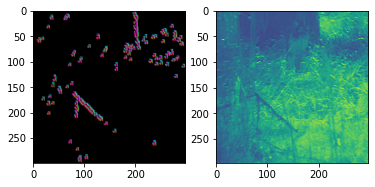

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
a=layers.Conv2D(1,(3,3),activation='relu')
b=layers.Conv2D(1,(5,5),activation='relu')
c=layers.Conv2D(1,(5,5),activation='relu')
d=layers.Conv2D(1,(5,5),activation='relu')
e=layers.Conv2D(1,(5,5),activation='relu')
#b=layers.Dense(10, activation='softmax')
input=x_train[0]
input=input[:30,:30,:]
input=tf.constant(np.expand_dims(x_train[0], axis=0))
with tf.GradientTape(persistent=True) as t0:
  t0.watch(input)
  with tf.GradientTape(persistent=True) as t1:
    t1.watch(input)
    y1=a(input)
    print(y1.shape)
    with tf.GradientTape(persistent=True) as t2:
      t2.watch(input)
      y2=b(y1)
      print(y2.shape)
      with tf.GradientTape(persistent=True) as t3:
        y3=c(y2)
        print(y3.shape)
        with tf.GradientTape(persistent=True) as t4:
          y4=d(y3)
          print(y4.shape)
          y5=e(y4)
          print(y5.shape)
          x,y=random.randint(0,y5.shape[-2]-1),random.randint(0,y5.shape[-2]-1)
          ne=np.zeros((1,y5.shape[-2],y5.shape[-2],1))
          for i in range(100):
            while(y5[0,x,y,0]<=0.0):
              x,y=random.randint(0,y5.shape[-2]-1),random.randint(0,y5.shape[-2]-1)
            ne[0,x,y,0]=1.0

          ne=ne.astype('float32')
          bb = tf.Variable(
          initial_value=ne)
          neww=y5*bb
        gd1 = t4.gradient(y5,y4)
        
        gd1=tf.where(gd1<0.0, 0.0, gd1)
        y44=y4*gd1
      gd2= t3.gradient(y44,y3)
      #print(gd2)
      
      gd2=tf.where(gd2<0.0, 0.0, gd2)
      y33=y3*gd2
    gd3= t2.gradient(y33,y2)
    c=0
    
    gd3=tf.where(gd3<0.0, 0.0, gd3)
    y22=y2*gd3
    #print(gd3)
  gd4= t1.gradient(y22,y1)
  gd4=tf.where(gd4<0.0, 0.0, gd4)
  y11=y1*gd4
gd5= t0.gradient(y11,input)
gd5=tf.where(gd5>0.0, 0.6, gd5)
c=0
for i in range(input.shape[-2]):
  for j in range(input.shape[-2]):
    if(gd5[0,i,j,0]>0):
      c+=1    
print(c)


pyplot.subplot(1,2,1)
y1=tf.reshape(y1,(297,297))
pyplot.imshow(gd5[0])
pyplot.subplot(1,2,2)
pyplot.imshow(y1)
        #loss= tf.constant(loss_cal(y_train[0], ftey[0]))
print(x,y ,y5[0,x,y,0])


In [ ]:
number of filters in each layer : 32, 64, ...
filter organisation: same number of filters in all layer, doubling in each subsequent layer, halving in each subsequent layer, etc
data augmentation (easy to do in keras): Yes, No
dropout: 20%, 30% (btw, where will you add dropout? you should read up a bit on this)
batch normalisation: Yes, No